In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [4]:
data=pd.read_csv("data_train.csv",names=["label","sentenc"])
data
X=data.sentenc.values
Y=data.label.values
label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(Y)

In [5]:
data_test=pd.read_csv("data_test.csv",names=["label","sentenc"])
data_test

,label,sentenc
0,__label__Statement,توطين زراعه الزعتر وتربيه النحل مشاريع دعم ا...
1,__label__Statement,حددت وزاره الصحه الاجراءات الوقائيه والضوابط...
2,__label__Activity,قسم شرطه القدم يلقي القبض عصابه سرقه وسلب مح...
3,__label__Group_Meeting,مجلس الشعب الوكاله العربيه السوريه للانباء س...
4,__label__Decision,الرئيس الاسد يصدر مرسوما يقضي بتعديل الحكومه...
...,...,...
4997,__label__Statement,التقى الدكتور عبد الله الغربي وزير التجاره ا...
4998,__label__Public_opinion,سوريه تفتخر منح سوريه بشار الاسد
4999,__label__Statement,الرئيس الاسد يستقبل المحافظين بحضور رئيس مجل...
5000,__label__Statement,طبيب طالي مخضرم لا هام الروس التاجي حذر طبيب...


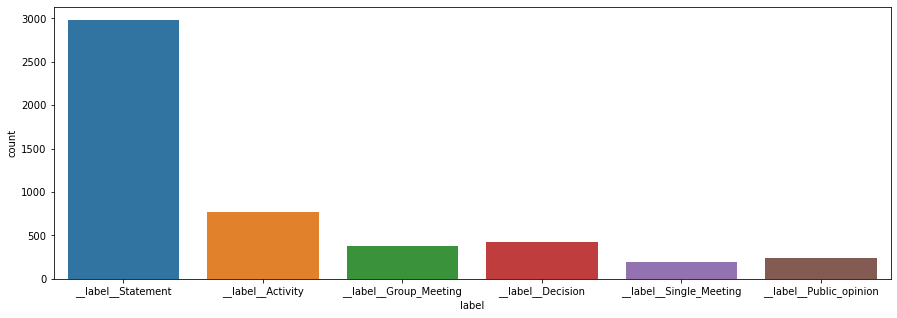

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=data_test)

In [7]:
data.label.value_counts()/data.label.value_counts().sum()

__label__Statement         0.591228
__label__Activity          0.156159
__label__Decision          0.096282
__label__Group_Meeting     0.069042
__label__Public_opinion    0.050454
__label__Single_Meeting    0.036834
Name: label, dtype: float64

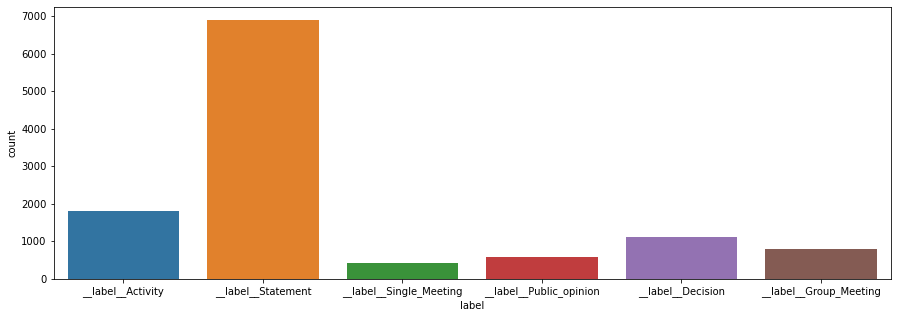

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=data)

In [9]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=30,random_state=50)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
model=Pipeline([("preprocess",TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}',ngram_range=(5,8), max_features=5000)),("model",SVC(kernel="rbf"))])

In [12]:

from sklearn.model_selection import GridSearchCV
param_grid = {'model__C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'model__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
# param_grid = {'model__C':[0.01,0.1,1.0,10]
# }

grid = GridSearchCV(model, param_grid, cv=7)

In [14]:
# grid.estimator.get_params().keys()

In [ ]:
grid.fit(X_train,Y_train)

In [91]:
predict_train=model.predict(X_train)
predict_test=model.predict(x_test)
print("train",metrics.accuracy_score(predict_train,Y_train))
print("test",metrics.accuracy_score(predict_test,y_test))

train 0.8394881484026108
test 0.8666666666666667


In [93]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, Y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(x_test)
print("dummy_score",metrics.accuracy_score(y_test,y_dummy_predictions))

dummy_score 0.6666666666666666


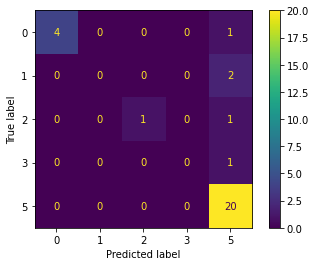

In [96]:
metrics.plot_confusion_matrix(model,x_test,y_test)

In [98]:
predict=model.predict(x_test)

In [99]:
metrics.accuracy_score(predicted,y_test)

0.8666666666666667

In [100]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       0.83      1.00      0.91        20

    accuracy                           0.87        30
   macro avg       0.97      0.72      0.80        30
weighted avg       0.89      0.87      0.85        30



In [68]:
pd.Series(y_test).value_counts()

5    15
1     2
0     1
2     1
3     1
dtype: int64